In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import netCDF4

In [3]:
def tidy_data(df, cols):
    df = df.to_dataframe().reset_index()

    dropcols = df.columns[cols]

    df = df.drop(dropcols, axis = 1).dropna()
    return df

def get_year_cols(df):
    df['year'] = df['calendar_year']
    df['month'] = df['month_number']

    data = df[df['region'].eq(6)]
    data = data[data['year'].gt(2003)]

    dropcols = ['calendar_year','month_number', 'region']

    data = (data.drop(dropcols, axis = 1)
                .drop_duplicates()
                .set_index(['month', 'year'])
                .sort_index()
                .unstack())
    return data

In [4]:
file1 = 'sfcWind_hadukgrid_uk_country_mon_196901-202012.nc'
df_wind = xr.open_dataset(f'C:\\Users\\markg\\Documents\\Python\\UofM Course\\datasets\\project\\{file1}')

file2 = 'sun_hadukgrid_uk_country_mon_191901-202012.nc'
df_sun = xr.open_dataset(f'C:\\Users\\markg\\Documents\\Python\\UofM Course\\datasets\\project\\{file2}')

file3 = 'tas_hadukgrid_uk_country_mon_188401-202012.nc'
df_temp = xr.open_dataset(f'C:\\Users\\markg\\Documents\\Python\\UofM Course\\datasets\\project\\{file3}')

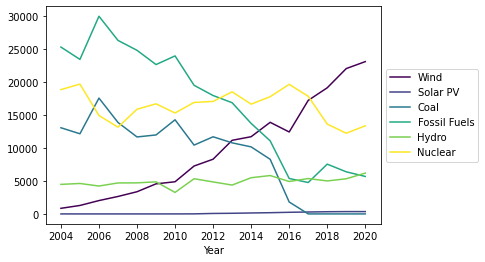

In [5]:
energy = pd.read_csv('C:\\Users\\markg\\Documents\\Python\\UofM Course\\datasets\\project\\Electricity Generation - Scotland (GWh).csv')
energy_data = energy[['Year', 'Wind','Solar PV', 'Coal', 'Fossil Fuels', 'Hydro', 'Nuclear']]
energy_data = energy_data.fillna(0)
energy_data.plot(x = 'Year', colormap = 'viridis').legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
# energy.plot().legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

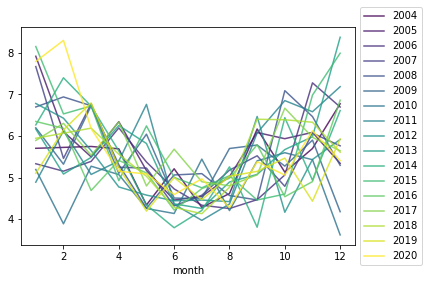

In [6]:
wind = tidy_data(df_wind, cols = [0,2,4,5,8]).rename({'sfcWind':'Data'}, axis = 1)
wind_data = get_year_cols(wind)
wind_data.plot(y = 'Data', colormap = 'viridis', alpha = .8).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

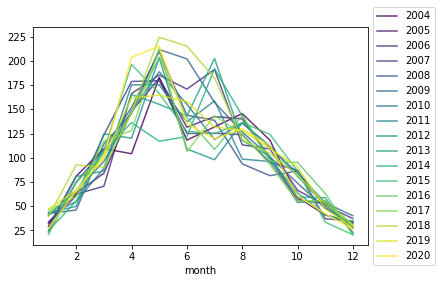

In [7]:
sun = (tidy_data(df_sun, cols = [0,2,4,5,8])
       .reset_index()
       .drop('index', axis = 1)
       .rename({'sun':'Data'}, axis = 1)) # required additionally tidying up

sun_data = get_year_cols(sun)
sun_data.plot(y = 'Data', colormap = 'viridis', alpha = .8).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

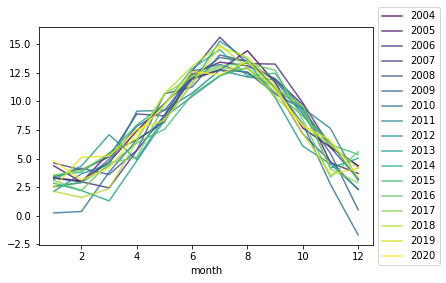

In [8]:
temp = tidy_data(df_temp, cols = [0,2,4,5,8]).rename({'tas':'Data'}, axis = 1)
temp_data = get_year_cols(temp)
temp_data.plot(y = 'Data', colormap = 'viridis', alpha = .8).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

In [10]:
# defining parametres
bgcolour = '#394048'  # colour of background
plt.rcParams.update({'text.color' : "white",  # setting test, ticks, edges and labels to white
                     'axes.labelcolor' : "white",
                     'xtick.color' : 'white',
                     'ytick.color' :'white',
                     'axes.edgecolor':'white',
                     'axes.linewidth': '1.2', # changing size of lines, ticks and axes
                     'ytick.major.size': '10',
                     'xtick.labelsize': '12',
                     'ytick.labelsize':'12', 
                     'axes.facecolor': bgcolour,
                     'figure.facecolor': bgcolour})

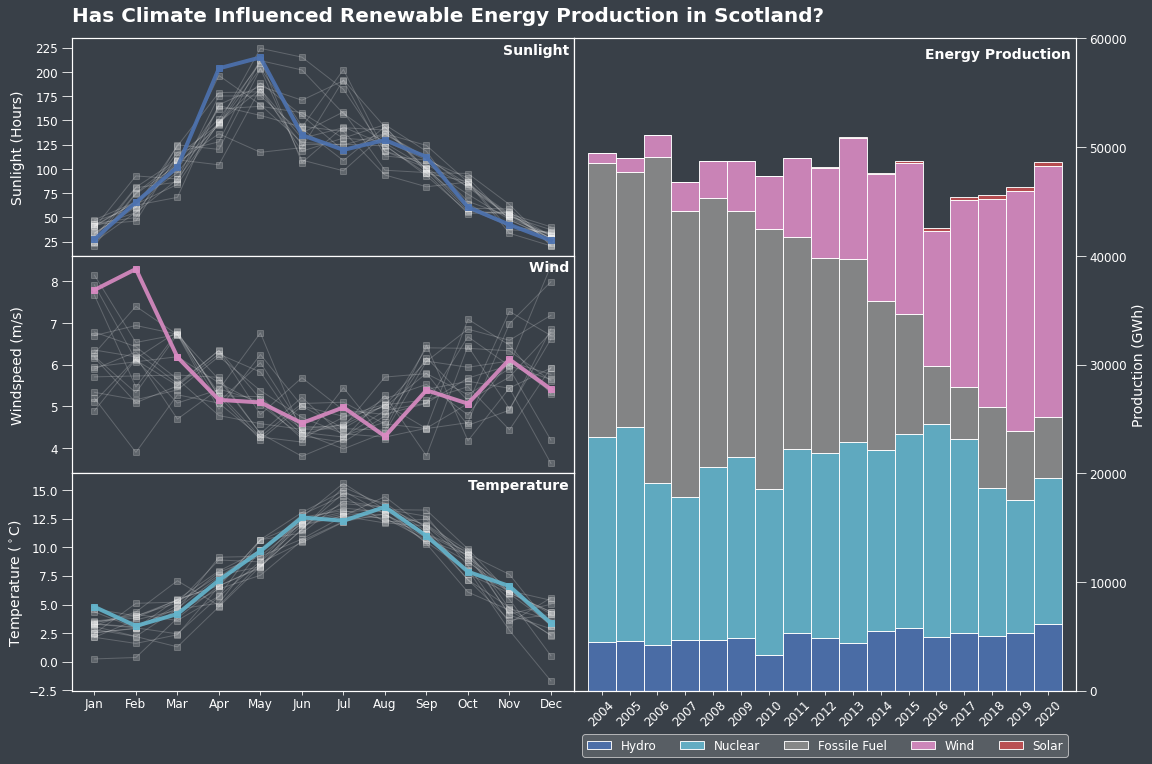

In [12]:
# creating one place to edit most features of graph
colourbar = sns.color_palette('deep')  # colour scheme 
ecolour = 'white'  # colour of the bars edges
year = 15  # getting 2020 from df
highlight = list([(colourbar[0]),(colourbar[6]),(colourbar[6]),(colourbar[9])])  # highlight colour for line charts
alpha = 0.9  # alpha of grey lines
alpha_b = 0.9 # alpha of the bars
lw_line = 4  # lw of both highlight and barchart
lw_bar = 1  # lw of both highlight and barchart
width = 1  # width of barcharts
marker = 's' # marker for line graph

# creating lists to iterate over to format graphs
data = ['sun_data', 'temp_data', 'wind_data', 'temp_data']
datatitles = ['Sunlight', 'Temperature', 'Wind', 'Temperature']
dataylabels = ['Sunlight (Hours)', 'Temperature ($^\circ$C)', 'Windspeed (m/s)','Temperature ($^\circ$C)']
months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
years = np.arange(2004, 2021, 1)

# Organising df into arrays to plot stacked chart (idk if there is an easier/better way)
ener1 = np.array(energy_data.Hydro)
ener2 = np.array(energy_data.Nuclear)
ener3 = np.array(energy_data['Fossil Fuels'])
ener4 = 0
# ener4 = np.array(energy_data.Coal)  #removing coal from graph
ener5 = np.array(energy_data.Wind)
ener6 = np.array(energy_data['Solar PV'])
ind = np.array(energy_data.Year)

# Creating figure and subplots
fig,axd = plt.subplot_mosaic([['upper left', 'right'],['left', 'right'],['lower left', 'right']], figsize = (18,12))

# ploting lines for temp, sun and wind data
for i in range(len(axd.keys())):
    axis = list(axd)[i]
    if i != 1:
        for year in range(len(eval(data[i]).columns)):
            axd[axis].plot(eval(data[i]).index, eval(data[i]).Data.values[:,year-1:year],
                           alpha = 0.2, linewidth = 1, marker = 's', c = 'white');

# Highlighting 2020
for i in range(len(axd.keys())):
    axis = list(axd)[i]
    if i != 1:
        axd[axis].plot(eval(data[i]).index, eval(data[i]).Data.values[:,16:17], 
                       alpha = alpha, linewidth = lw_line, marker = marker, c = highlight[i]);
        axd[axis].set_title(f'{datatitles[i]} ', y = .9, loc = 'right', size = 14, ha = 'right', fontweight = 'bold')
        axd[axis].set_ylabel(f'{dataylabels[i]}', size = 14, x = -5)

# Stacking bars for energy chart on right handside  (coal has been removed)      
axd['right'].bar(ind, ener1, width, color= colourbar[0], linewidth = lw_bar, edgecolor = ecolour,alpha = alpha_b,)
axd['right'].bar(ind, ener2, width, color= colourbar[9], linewidth = lw_bar, edgecolor = ecolour,alpha = alpha_b, bottom = ener1)
axd['right'].bar(ind, ener3, width, color= colourbar[7], linewidth = lw_bar, edgecolor = ecolour,alpha = alpha_b, bottom = ener1+ener2)
# axd['right'].bar(ind, ener4, width, color= colourbar[3], linewidth = lw_bar, edgecolor = ecolour,alpha = alpha_b, bottom = ener1+ener2+ener3)
axd['right'].bar(ind, ener5, width, color= colourbar[6], linewidth = lw_bar, edgecolor = ecolour,alpha = alpha_b, bottom=ener1+ener2+ener3+ener4)
axd['right'].bar(ind, ener6, width, color= colourbar[3], linewidth = lw_bar, edgecolor = ecolour,alpha = alpha_b, bottom=ener1+ener2+ener3+ener4+ener5)

# formatting subplots, axes and titles
plt.subplots_adjust(hspace = 0, wspace = 0)  # adjusting gaps between subplots
plt.xticks(np.arange(1,13,1), months)  # changing x axes
fig.align_ylabels([axd['left'], axd['upper left'], axd['lower left']])  # align y labels

axd['right'].yaxis.tick_right()  # set right subplot y ticks to right
axd['right'].yaxis.set_label_position('right')  # set right subplot y ticks to right

axd['right'].set_xticks(labels = years, ticks = years, rotation = 45, size = 12)
axd['right'].set_title('Energy Production ', y = .96, loc = 'right', size = 14, ha = 'right', fontweight = 'bold')
axd['right'].set_ylabel('Production (GWh)', size = 14)

# legend for barchart
legend = axd['right'].legend(['Hydro', 'Nuclear','Fossile Fuel', 'Wind', 'Solar'], 
                    loc = 'lower center', ncol = 5, borderaxespad = -5.5, fontsize = 12)
legend.get_frame().set_facecolor('#60666C')
axd['right'].axis([2003,2021, 0, 60000])


# title
plt.title('Has Climate Influenced Renewable Energy Production in Scotland?', 
          size = 20, loc = 'left', y = 3.05, fontweight = 'bold')


# Changing Background colour for all subplots and figure
for keys in axd.keys():
    axd[keys].set_facecolor(bgcolour)
fig.patch.set_facecolor(bgcolour)


# plt.savefig('images/weathergraph.png')

plt.show()
plt.close()